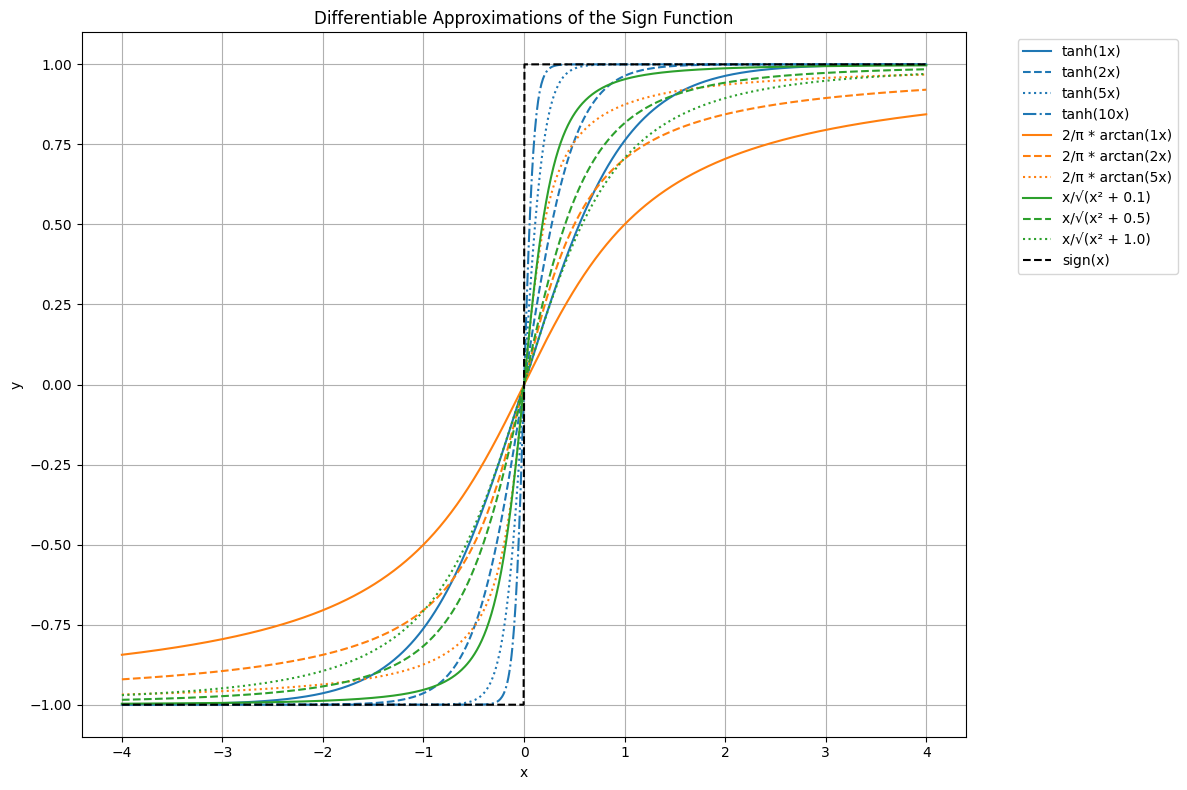

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Generate x values
x = np.linspace(-4, 4, 1000)

# Create figure
plt.close()
plt.figure(figsize=(12, 8))

# Plot tanh with different steepness values
color = "C0"
linestyles = ["-", "--", ":", "-."]
for a, ls in zip([1, 2, 5, 10], linestyles):
    y = np.tanh(a * x)
    plt.plot(x, y, color=color, ls=ls, label=f"tanh({a}x)")

# Plot arctan with different steepness values
color = "C1"
for a, ls in zip([1, 2, 5], linestyles):
    y = 2 / np.pi * np.arctan(a * x)
    plt.plot(x, y, color=color, ls=ls, label=f"2/π * arctan({a}x)")

# Plot soft sign with different epsilon values
color = "C2"
for eps, ls in zip([0.1, 0.5, 1.0], linestyles):
    y = x / np.sqrt(x**2 + eps)
    plt.plot(x, y, color=color, ls=ls, label=f"x/√(x² + {eps})")

# Plot sigmoid with different steepness values
color = "C3"
# sigmoid = tanh
# for a, ls in zip([1, 2, 5], linestyles):
#     y = 2/(1 + np.exp(-2*a*x)) - 1
#     plt.plot(x, y, color=color, ls=ls, label=f'2σ({a}x) - 1')

# Plot true sign function for reference
plt.plot(x, np.sign(x), "--k", label="sign(x)")

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Differentiable Approximations of the Sign Function")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
# plt.show()

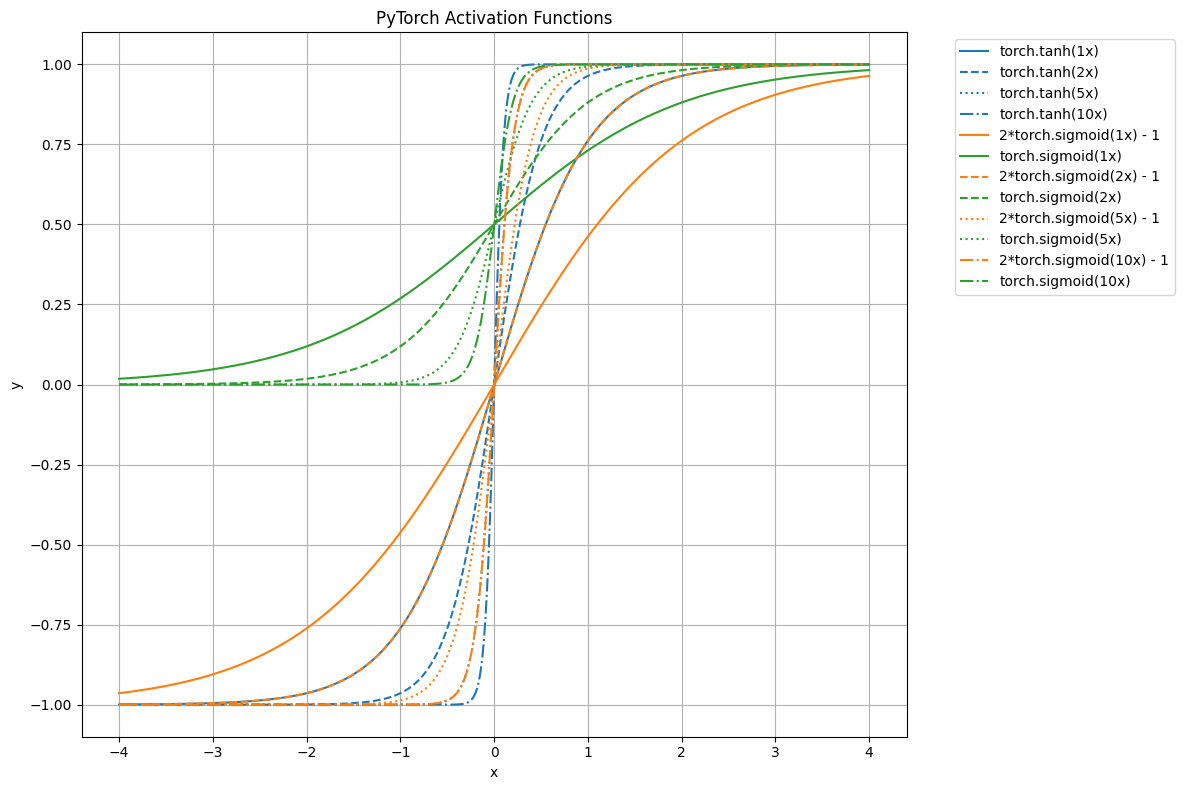

In [17]:
# Plot torch sigmoid and tanh
plt.close()
plt.figure(figsize=(12, 8))

x = torch.linspace(-4, 4, 1000)

# Plot torch.tanh with different steepness values
color = "C0"
linestyles = ["-", "--", ":", "-."]
for a, ls in zip([1, 2, 5, 10], linestyles):
    y = torch.tanh(a * x)
    plt.plot(x.numpy(), y.numpy(), color=color, ls=ls, label=f"torch.tanh({a}x)")

# Plot torch.sigmoid with different steepness values
color = "C1"
for a, ls in zip([1, 2, 5, 10], linestyles):
    y = 2 * torch.sigmoid(a * x) - 1  # Scale sigmoid to [-1,1] range
    plt.plot(
        x.numpy(), y.numpy(), color=color, ls=ls, label=f"2*torch.sigmoid({a}x) - 1"
    )
    y = torch.sigmoid(a * x)
    plt.plot(x.numpy(), y.numpy(), color="C2", ls=ls, label=f"torch.sigmoid({a}x)")

plt.close()
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("PyTorch Activation Functions")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()

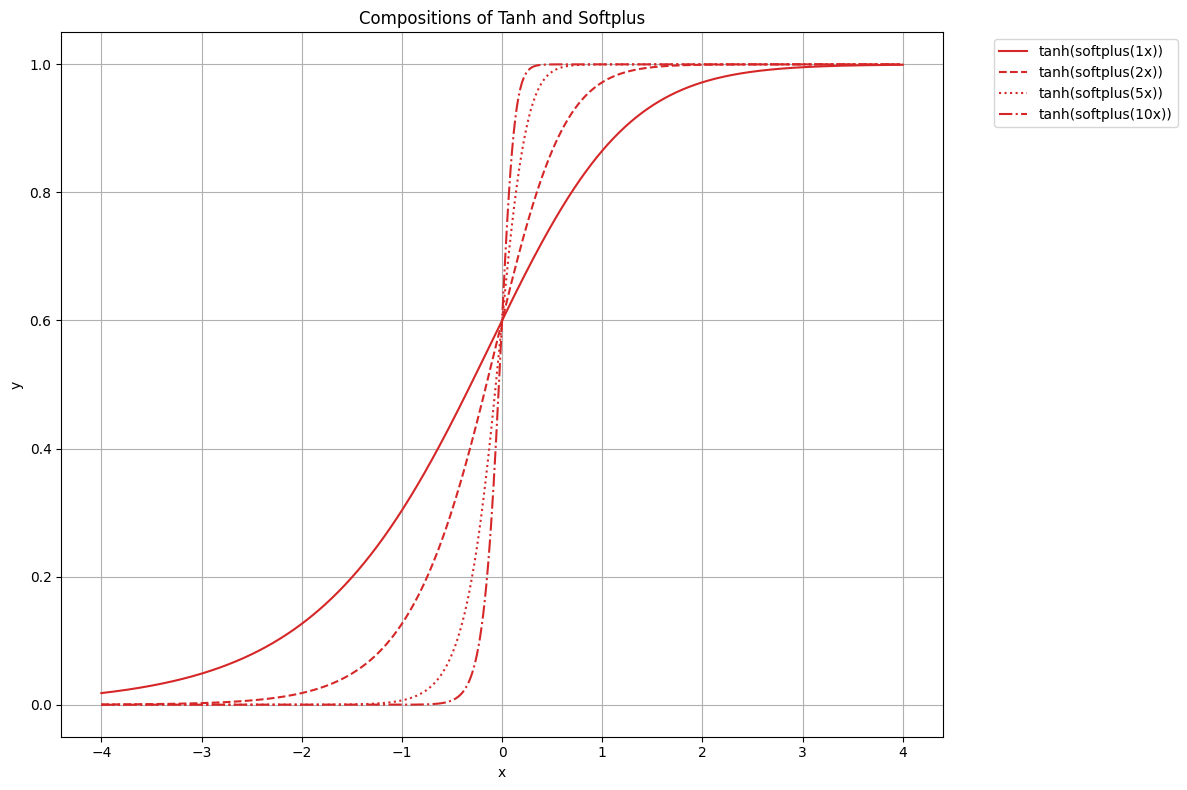

In [19]:
# Plot compositions of tanh and softplus
plt.close()
plt.figure(figsize=(12, 8))

x = torch.linspace(-4, 4, 1000)

# Plot tanh(softplus(x)) with different steepness values
color = "C3"
linestyles = ["-", "--", ":", "-."]
for a, ls in zip([1, 2, 5, 10], linestyles):
    y = torch.tanh(torch.nn.functional.softplus(a * x))
    plt.plot(x.numpy(), y.numpy(), color=color, ls=ls, label=f"tanh(softplus({a}x))")

# # Plot softplus(tanh(x)) with different steepness values
# color = 'C4'
# for a, ls in zip([1, 2, 5, 10], linestyles):
#     y = torch.nn.functional.softplus(torch.tanh(a*x))
#     plt.plot(x.numpy(), y.numpy(), color=color, ls=ls, label=f'softplus(tanh({a}x))')

plt.close()
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Compositions of Tanh and Softplus")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()

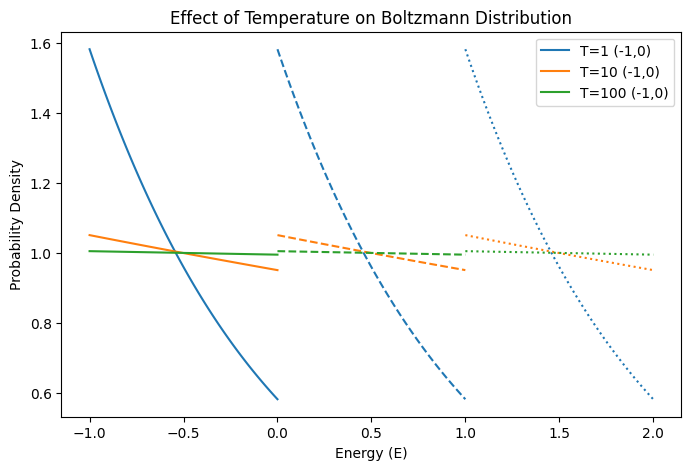

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define energy ranges
E1 = np.linspace(-1, 0, 100)
E2 = np.linspace(0, 1, 100)
E3 = np.linspace(1, 2, 100)

# Different temperatures
temperatures = [1, 10, 100]


# Boltzmann distribution function
def boltzmann(E, T):
    return np.exp(-E / T)


# Plot
plt.close()
plt.figure(figsize=(8, 5))
for i, T in enumerate(temperatures):
    P1 = boltzmann(E1, T)
    P2 = boltzmann(E2, T)
    P3 = boltzmann(E3, T)

    # Normalize for visualization
    P1 /= np.trapz(P1, E1)
    P2 /= np.trapz(P2, E2)
    P3 /= np.trapz(P3, E3)

    plt.plot(E1, P1, label=f"T={T} (-1,0)", color=f"C{i}")
    plt.plot(E2, P2, linestyle="dashed", color=f"C{i}")
    plt.plot(E3, P3, linestyle="dotted", color=f"C{i}")

plt.xlabel("Energy (E)")
plt.ylabel("Probability Density")
plt.title("Effect of Temperature on Boltzmann Distribution")
plt.legend()
plt.show()

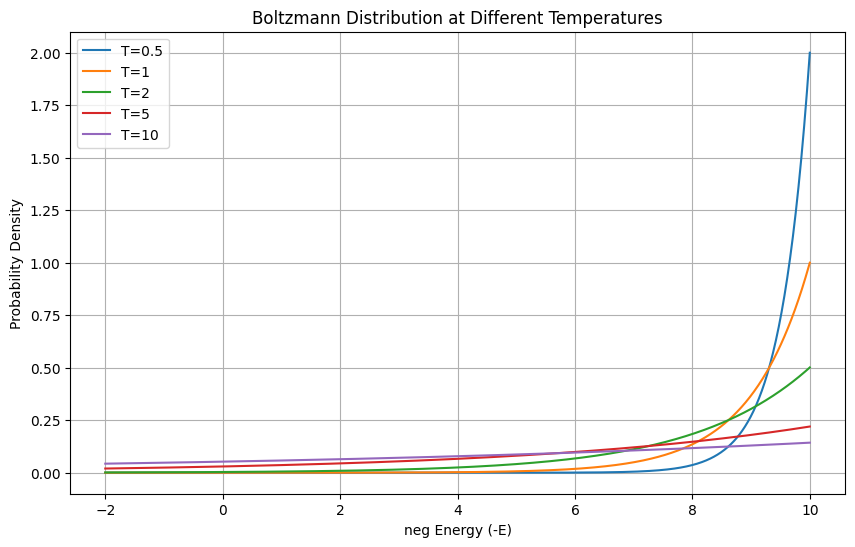

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define energy range
E = np.linspace(-10, 10, 1000)
E = np.linspace(-2, 10, 1000)

# Different temperatures
temperatures = [0.5, 1, 2, 5, 10]


# Boltzmann distribution function
def boltzmann(E, T):
    return np.exp(E / T)


# Plot
plt.close()
plt.figure(figsize=(10, 6))
for T in temperatures:
    P = boltzmann(E, T)

    # Normalize for visualization
    P /= np.trapz(P, E)

    plt.plot(E, P, label=f"T={T}")

plt.xlabel("neg Energy (-E)")
plt.ylabel("Probability Density")
plt.title("Boltzmann Distribution at Different Temperatures")
plt.legend()
plt.grid(True)
plt.show()

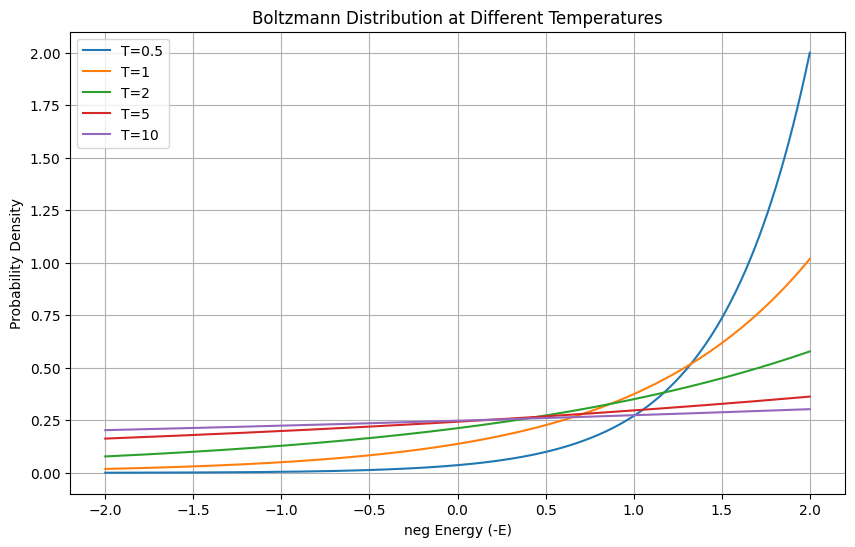

In [26]:
# Define energy range
E = np.linspace(-10, 10, 1000)
E = np.linspace(-2, 2, 1000)

# Different temperatures
temperatures = [0.5, 1, 2, 5, 10]


# Boltzmann distribution function
def boltzmann(E, T):
    return np.exp(E / T)


# Plot
plt.close()
plt.figure(figsize=(10, 6))
for T in temperatures:
    P = boltzmann(E, T)

    # Normalize for visualization
    P /= np.trapz(P, E)

    plt.plot(E, P, label=f"T={T}")

plt.xlabel("neg Energy (-E)")
plt.ylabel("Probability Density")
plt.title("Boltzmann Distribution at Different Temperatures")
plt.legend()
plt.grid(True)
plt.show()

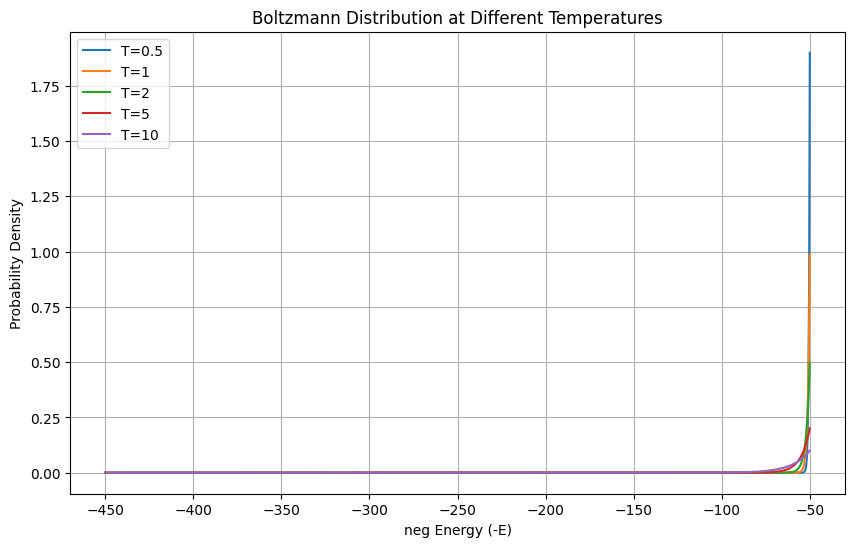

In [27]:
# Define energy range
E = np.linspace(-10, 10, 1000)
E = np.linspace(-450, -50, 1000)

# Different temperatures
temperatures = [0.5, 1, 2, 5, 10]


# Boltzmann distribution function
def boltzmann(E, T):
    return np.exp(E / T)


# Plot
plt.close()
plt.figure(figsize=(10, 6))
for T in temperatures:
    P = boltzmann(E, T)

    # Normalize for visualization
    P /= np.trapz(P, E)

    plt.plot(E, P, label=f"T={T}")

plt.xlabel("neg Energy (-E)")
plt.ylabel("Probability Density")
plt.title("Boltzmann Distribution at Different Temperatures")
plt.legend()
plt.grid(True)
plt.show()

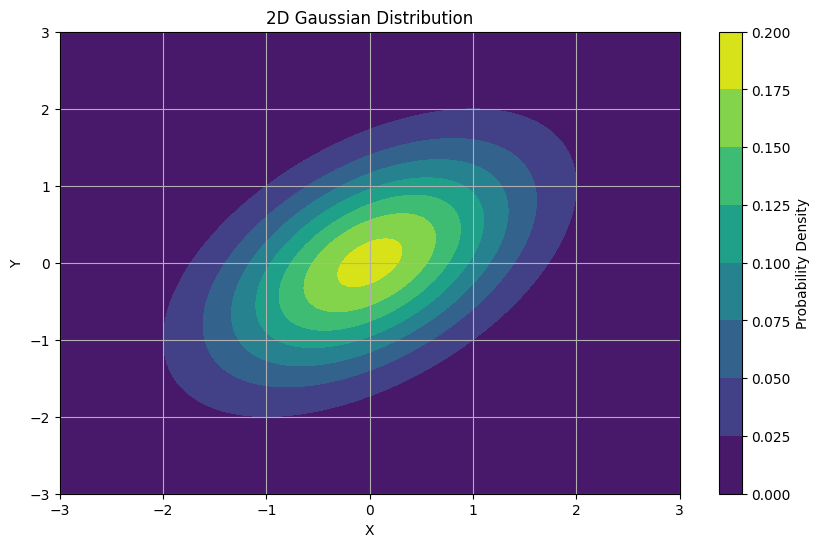

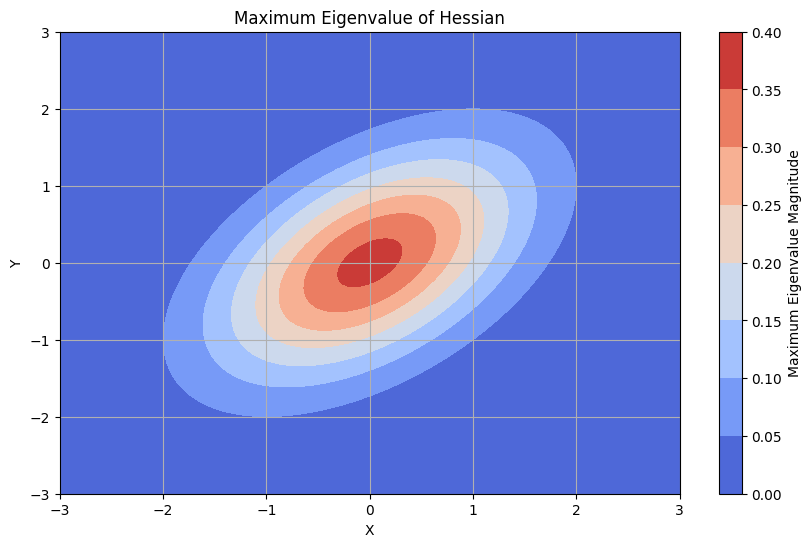

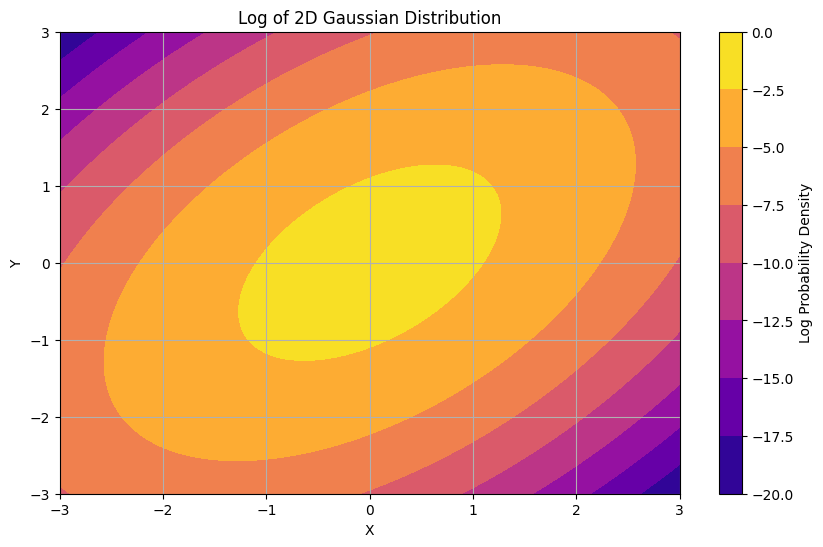

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal

# Create a 2D grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Define a 2D Gaussian
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  # Covariance matrix with correlation
gaussian = multivariate_normal(mean, cov)

# Compute the PDF values
Z = gaussian.pdf(pos)

# Plot the 2D Gaussian
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, cmap=cm.viridis)
plt.colorbar(label="Probability Density")
plt.title("2D Gaussian Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


# Compute the Hessian of the Gaussian at each point on the grid
def gaussian_hessian(x, y, cov_inv):
    """Compute the Hessian matrix of a Gaussian at point (x,y)"""
    # For a Gaussian, the Hessian is -p(x,y) * (cov_inv - cov_inv @ [x,y] @ [x,y]^T @ cov_inv)
    # But for simplicity, we'll just return -cov_inv * p(x,y) as the main component
    p = gaussian.pdf(np.array([x, y]))
    return -p * cov_inv


# Compute inverse covariance matrix
cov_inv = np.linalg.inv(cov)

# Compute eigenvalues of the Hessian at each grid point
eigenvalues = np.zeros((len(x), len(y), 2))
for i in range(len(x)):
    for j in range(len(y)):
        hessian = gaussian_hessian(x[i], y[j], cov_inv)
        eig_vals, _ = np.linalg.eig(hessian)
        eigenvalues[i, j] = eig_vals

# Plot the maximum eigenvalue of the Hessian
plt.figure(figsize=(10, 6))
max_eig = np.max(np.abs(eigenvalues), axis=2)
plt.contourf(X, Y, max_eig, cmap=cm.coolwarm)
plt.colorbar(label="Maximum Eigenvalue Magnitude")
plt.title("Maximum Eigenvalue of Hessian")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# Plot the log of the Gaussian
plt.figure(figsize=(10, 6))
log_Z = np.log(Z)
plt.contourf(X, Y, log_Z, cmap=cm.plasma)
plt.colorbar(label="Log Probability Density")
plt.title("Log of 2D Gaussian Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


# Compute the Hessian of the log Gaussian at each point on the grid
def log_gaussian_hessian(x, y, cov_inv):
    """Compute the Hessian matrix of the log of a Gaussian at point (x,y)"""
    # For a log Gaussian, the Hessian is simply -cov_inv
    return -cov_inv


# Compute eigenvalues of the log Gaussian Hessian at each grid point
eigenvalues_log = np.zeros((len(x), len(y), 2))
for i in range(len(x)):
    for j in range(len(y)):
        hessian = log_gaussian_hessian(x[i], y[j], cov_inv)
        eig_vals, _ = np.linalg.eig(hessian)
        eigenvalues_log[i, j] = eig_vals

# Plot the maximum eigenvalue of the log Gaussian Hessian
plt.figure(figsize=(10, 6))
max_eig_log = np.max(np.abs(eigenvalues_log), axis=2)
plt.contourf(X, Y, max_eig_log, cmap=cm.coolwarm)
plt.colorbar(label="Maximum Eigenvalue Magnitude")
plt.title("Maximum Eigenvalue of Log Gaussian Hessian")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()